<a href="https://colab.research.google.com/github/irsyaddani/PCVK_2024_17/blob/main/Week10_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Irsyad Danisaputra
<br> NIM: 2241720233
<br> Absen: 17
<br> Kelas: TI-3E

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul10/assets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pip install pytesseract
# Import Library
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

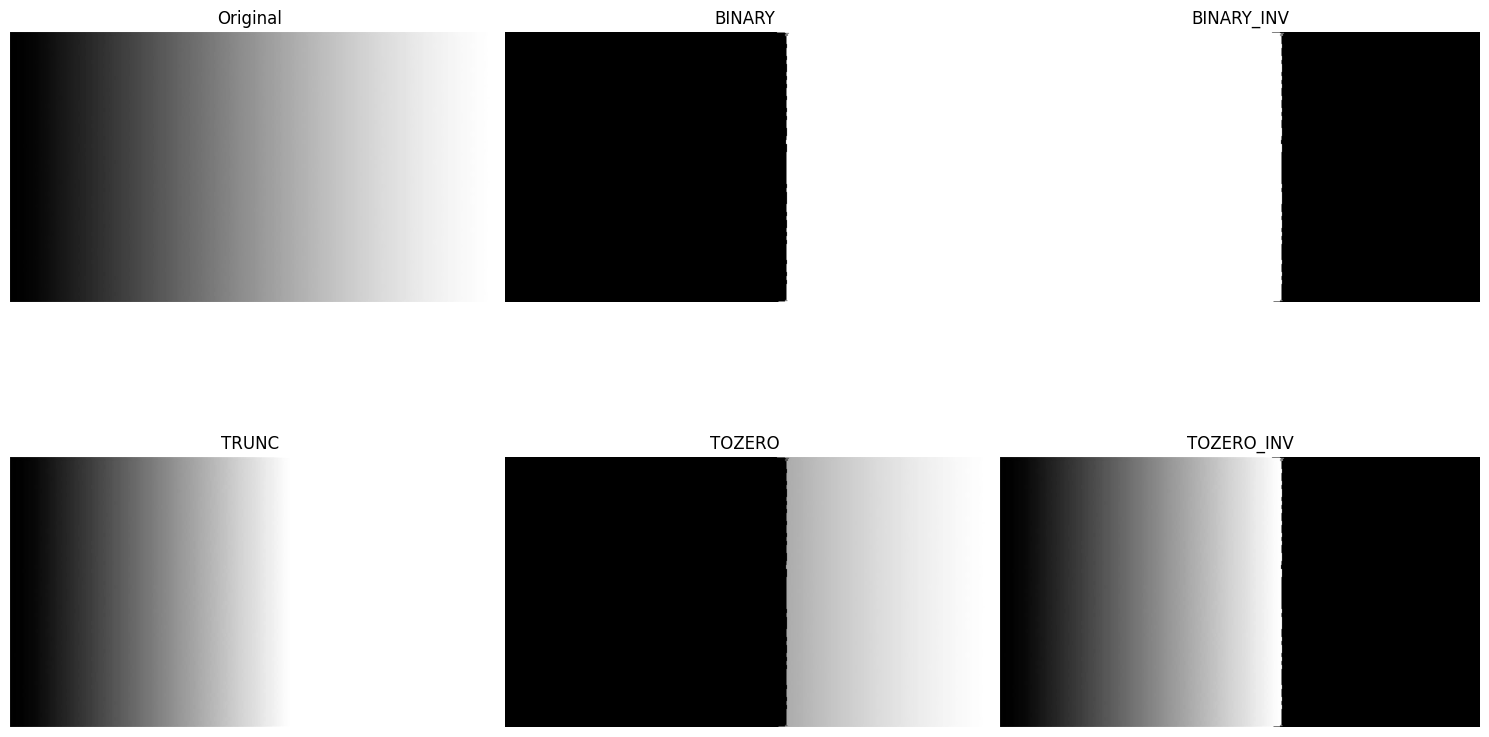

In [8]:
# Fungsi untuk menampilkan gambar
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i + 1)
        if len(img.shape) == 2:  # Grayscale image
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Membaca gambar dalam format grayscale
image = cv2.imread(path + 'gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Menetapkan nilai threshold
threshold = 170

# Threshold BINARY
binary = np.where(image > threshold, 255, 0).astype(np.uint8)

# Threshold BINARY_INV
binary_inv = np.where(image > threshold, 0, 255).astype(np.uint8)

# Threshold TRUNC
trunc = np.where(image > threshold, threshold, image).astype(np.uint8)

# Threshold TOZERO
tozero = np.where(image > threshold, image, 0).astype(np.uint8)

# Threshold TOZERO_INV
tozero_inv = np.where(image > threshold, 0, image).astype(np.uint8)

# Menampilkan hasil
images = [image, binary, binary_inv, trunc, tozero, tozero_inv]
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
display_images(images, titles)

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

167


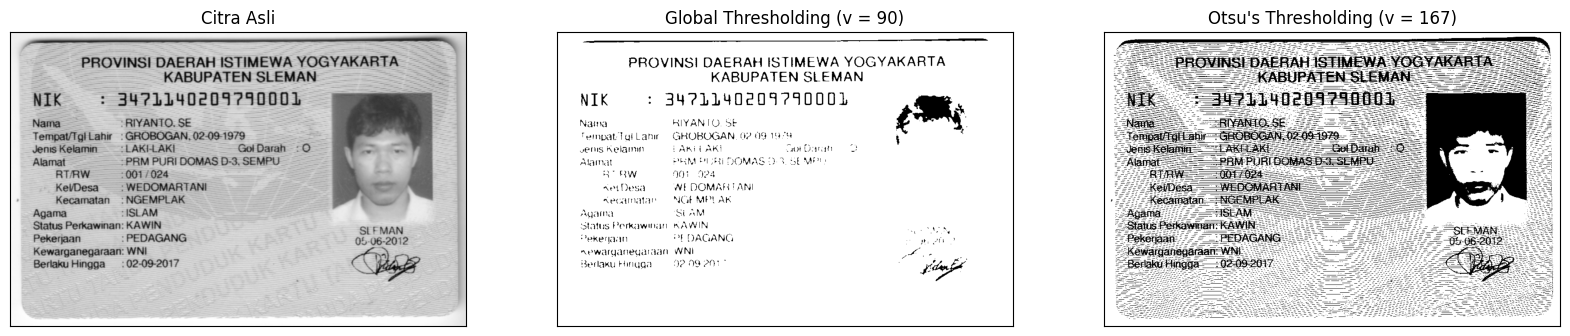

In [20]:
image = (path +'ktp-riyanto.png')
img = cv.imread(image,0)
blur = cv.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

  Petunjuk:
  <br>a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencv-
  tutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
  yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
  histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
  dimasking warna putih yang akan dihitung histogramnya (dari contoh
  dibawah dinamakan dengan Citra Segment).

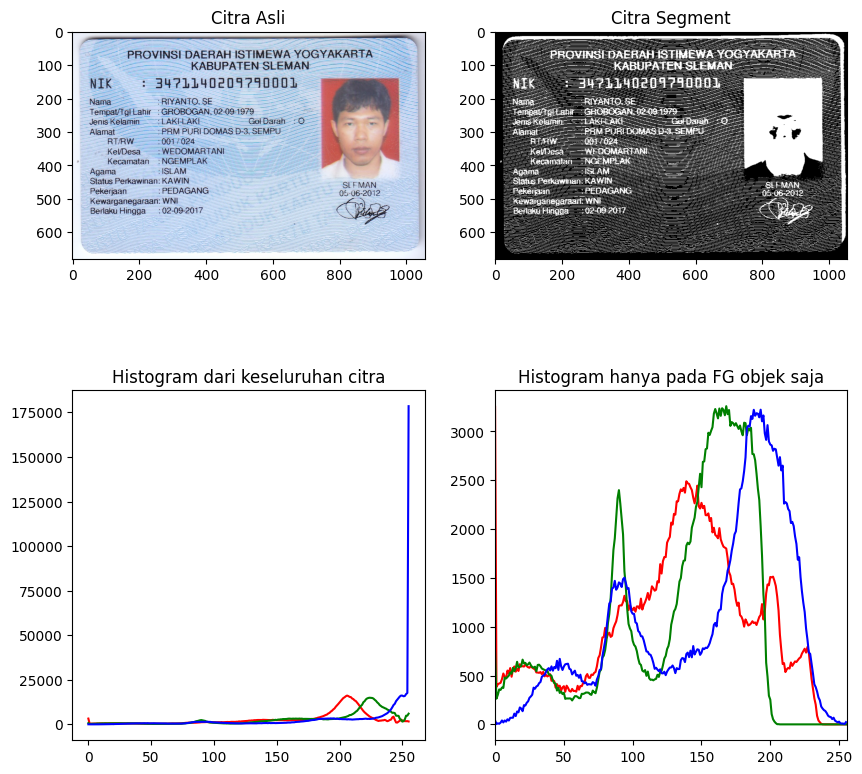

In [22]:
image = (path+'ktp-riyanto.png')
img = cv.imread(image)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warnayang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7b681f1a7fd0>)

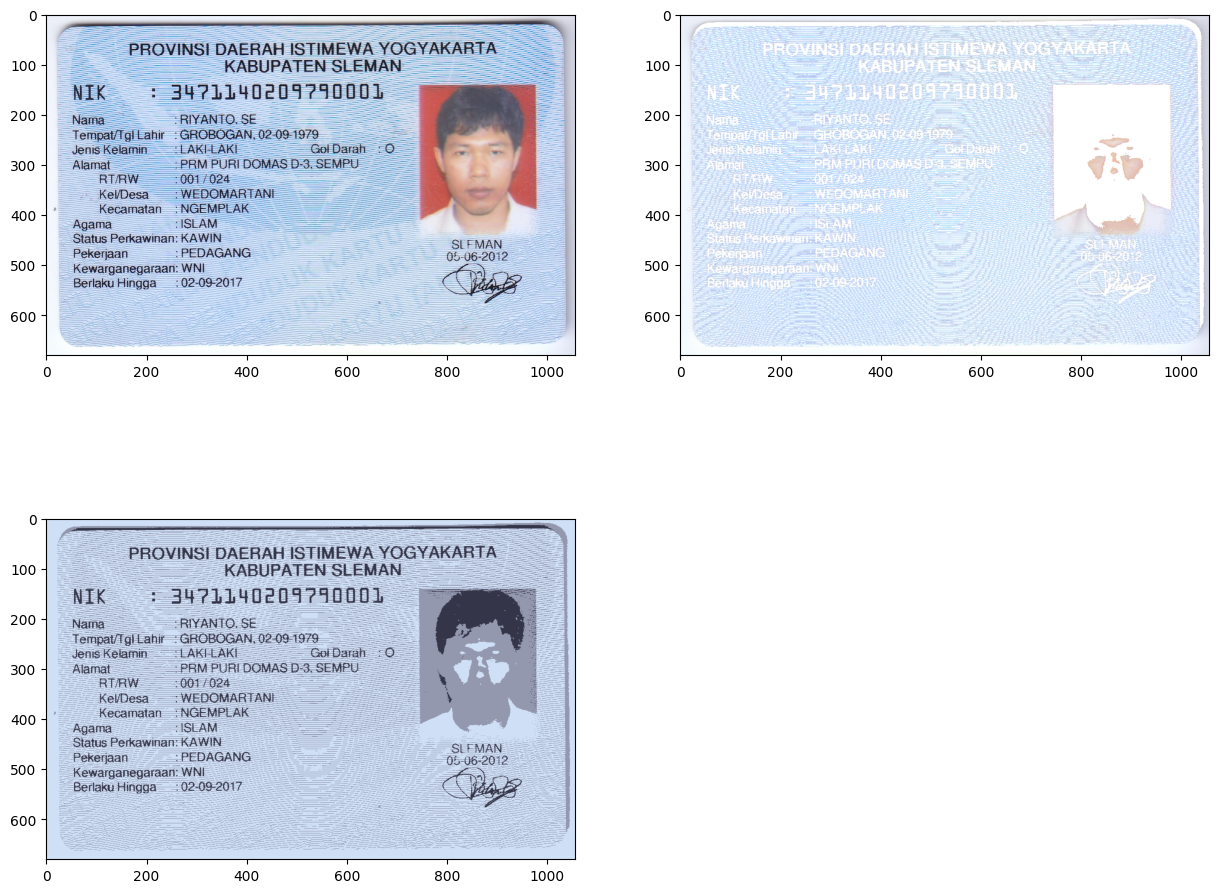

In [26]:
image = (path + 'ktp-riyanto.png')
img = cv.imread(image)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta
array 2D sebagai masukan, sedangkan image aslinya adalah
array 3D
selanjutnya kita perlu melakukan flattening array image
masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid
sudah tidak terlalu banyak pergeseran posisi antara
interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data
yang besar, maka kita akan hentikan iterasi saat jumlah
iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn
posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS +
cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama
(hijau, biru, dan putih/orange). untuk percobaan ini kita
akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None,
criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

### Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

1. Install PIP OCR

In [27]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (12.0 MB/s)
debconf: unable to init

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [28]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [30]:
from pytesseract import Output
img = cv.imread(path + 'ktp-riyanto.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
threshold = 127
th,threshed=cv.threshold(gray, threshold, 255, cv.THRESH_TRUNC)
d = pytesseract.image_to_data((threshed), output_type=Output.DICT,lang='ind')
print(d.keys())
print(d['text'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
['', '', '', '', 'em', '', '', '', 'PROVINSI', 'DAERAH', 'ISTIMEWA', 'YOGYAKARTA', '', 'KABUPATEN', 'SLEMAN', '', '', '', ' ', '', '', '', 'NIK', ':', '34711140209790001', '', '', 'Nama', ':RIYANTO.', 'SE', '', '', 'Tempat/Tgl', 'Lahir', ':', 'GROBOGAN.', '02-09-1979', '', '', 'Jenis', 'Kelamin', ':', 'LAKI-LAKI', 'Gol', 'Darah', ':', '0', '', '', 'Alamat', 'PRM', 'PURI', 'DOMAS', 'D-3.', 'SEMPU', '', 'RTRW', '1001', '1024', '', '', '', 'Kel/Desa', ':', 'WEDOMARTANI!', '', 'Kecamatan', ':', 'NGEMPLAK', '', '', '', 'Agama', '"ISLAM', '', 'Status', 'Bean', 'KAWIN', 'SLEMAN', '', 'Pekerjaan', ':', 'PEDAGANG', '05-06-2012', '', '', '', 'Kewarganegaraan:', 'WNI', 'HI', '—', '', 'Berlaku', 'Hingga', ':02-09-2017', 'NIA', '', '', '', '   ', '', ' ', '', '', '', '']


4. Menambahkan kotak untuk deteksi teksi pada gambar

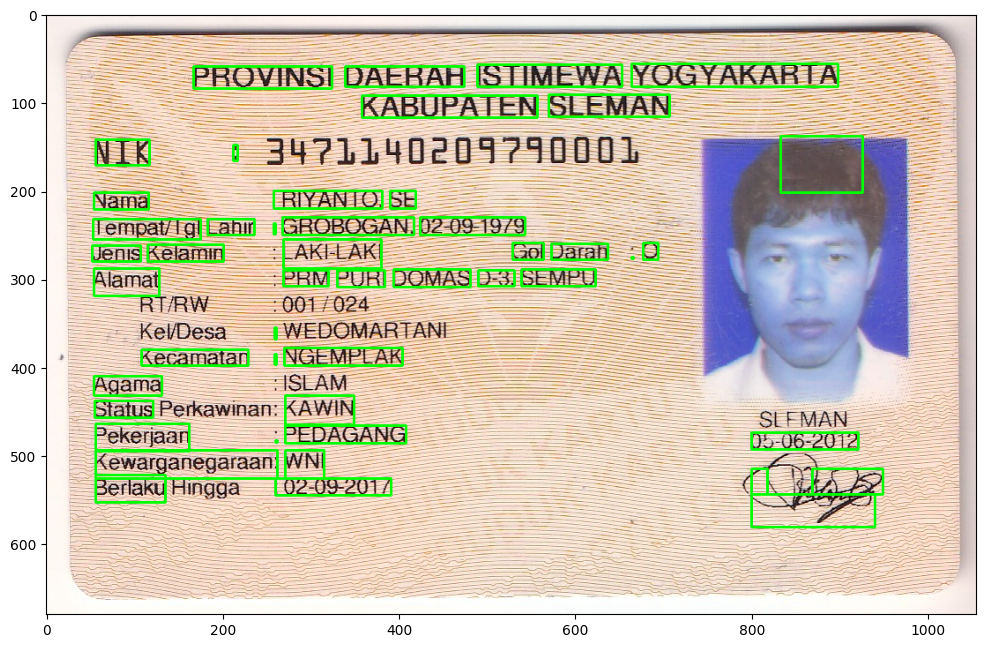

In [31]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

5. Hasil pembacaan KTP Menjadi text

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



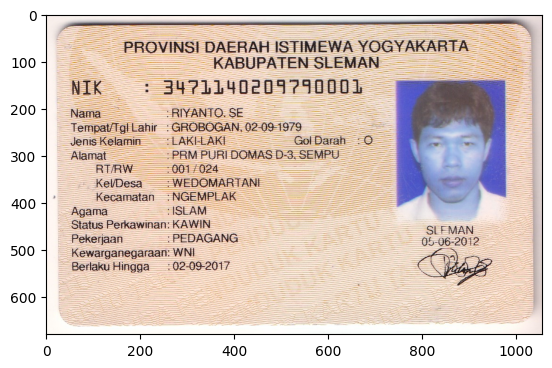

In [32]:
img = cv.imread(path + "ktp-riyanto.png")
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
threshold = 127
th,threshed=cv.threshold(gray, threshold, 255, cv.THRESH_TRUNC)
d = pytesseract.image_to_string((threshed), lang='ind')
print(d)

### Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.

['', '', '', '', 'AA,', '', '', '', 'PROVINSI', 'DAERAH', 'ISTIMEWA', 'YOGYAKARTA', '', '', '', 'KABUPATEN', 'SLEMAN', '', 'NIK', '1', '34?121140209799001', '', 'Nama', ':', 'RIYANTO.', 'SE', '', 'Tempat/Tgi', 'Lahir:', 'GROBOGAN.', '02-09-1979', '', 'Jenis', 'Ketaman', ':', 'LAKI-LAKI', 'Gol', 'Darah', ':', '0', '', 'Alamat', ':', 'PRM', 'PURI', 'DOMAS', 'D-3.', 'SEMPU', '', 'RTRW', '1001', 'G24', '', '', '', 'Ke/Desa', ':', 'WEDOMARTANI', '', 'Kecamatan', ':', 'NGEMPLAK', '', '', '', ' ', '', '', '', 'Agama', 'ISLAM', '', 'Status', 'Perkawmnan:', 'KAWIN', 'SLF', 'MAN', '', 'Pekerjaan', ':', 'PEDAGANG', '05-06-2012', '', '', '', 'Kewarganegaraan:', 'WNI', '', 'Beriaku', 'Hingga', '02-09-2017', 'ON']
AA,

PROVINSI DAERAH ISTIMEWA YOGYAKARTA

KABUPATEN SLEMAN
NIK 1 34?121140209799001
Nama : RIYANTO. SE
Tempat/Tgi Lahir: GROBOGAN. 02-09-1979
Jenis Ketaman : LAKI-LAKI Gol Darah : 0
Alamat : PRM PURI DOMAS D-3. SEMPU
RTRW 1001 G24

Ke/Desa : WEDOMARTANI
Kecamatan : NGEMPLAK

 

Agama ISLAM

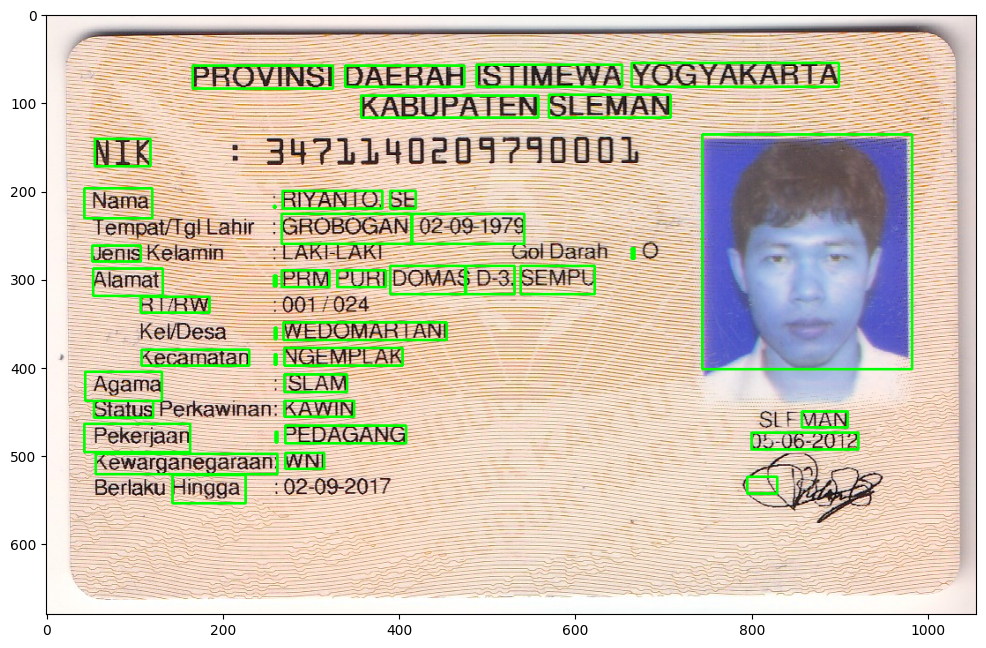

In [33]:
from pytesseract import Output

img = cv.imread(path + 'ktp-riyanto.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(3,3),0)
threshold = 127
th,threshed=cv.threshold(blur, threshold, 255, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv.morphologyEx((threshed),cv.MORPH_OPEN, kernel)
d = pytesseract.image_to_data((closs), output_type=Output.DICT,lang='ind')
print(d['text'])

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)
d = pytesseract.image_to_string((closs), lang='ind')
print(d)

In [34]:
!apt-get install -y texlive texlive-xetex texlive-latex-extra pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [36]:
!jupyter nbconvert --to pdf /content/Week10_17.ipynb

[NbConvertApp] Converting notebook /content/Week10_17.ipynb to pdf
[NbConvertApp] Support files will be in Week10_17_files/
[NbConvertApp] Making directory ./Week10_17_files
[NbConvertApp] Writing 96220 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 4158527 bytes to /content/Week10_17.pdf
